<a href="https://colab.research.google.com/github/jomariy241/assignment/blob/main/preprocessing_case_study18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df=pd.read_csv('/content/House_Pricing.csv')
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [138]:
df.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [139]:
df.isnull().sum().sort_values(ascending=False)

No of Times Visited                          19489
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
Sale Price                                       4
No of Bathrooms                                  4
Area of the House from Basement (in Sqft)        3
Living Area after Renovation (in Sqft)           1
Longitude                                        1
Latitude                                         1
Zipcode                                          1
ID                                               0
Age of House (in Years)                          0
Renovated Year                                   0
Condition of the House                           0
Basement Area (in Sqft)                          0
Overall Grade                                    0
Date House was Sold                              0
Waterfront View                                  0
No of Floors                                     0
No of Bedrooms                 

In [140]:
df.shape

(21613, 21)

In [141]:
#get numerical column
numCol  = [col for col in df.columns if  df[col].dtype != "O"]
numCol


['ID',
 'Sale Price',
 'No of Bedrooms',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'No of Floors',
 'Overall Grade',
 'Area of the House from Basement (in Sqft)',
 'Basement Area (in Sqft)',
 'Age of House (in Years)',
 'Renovated Year',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)',
 'Lot Area after Renovation (in Sqft)']

In [142]:
#get categorical column
catCol  = [col for col in df.columns if  df[col].dtype == "O"]
catCol

['Date House was Sold',
 'Waterfront View',
 'No of Times Visited',
 'Condition of the House']

In [143]:
#check duplicate data
df.duplicated().sum()

0

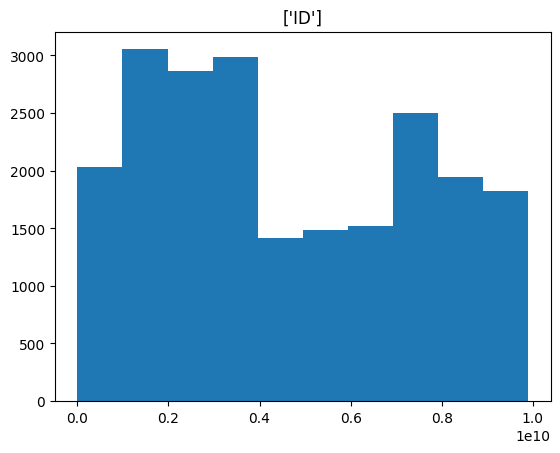

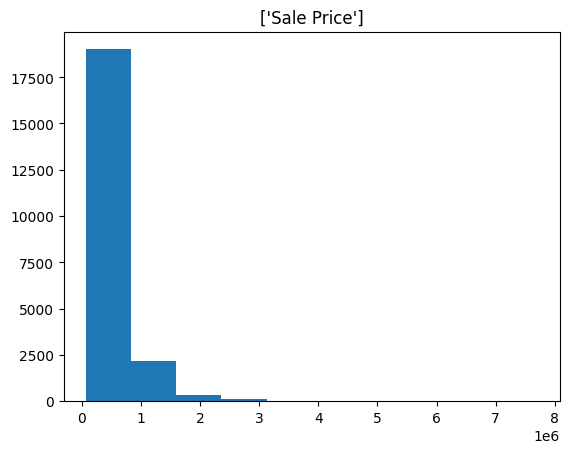

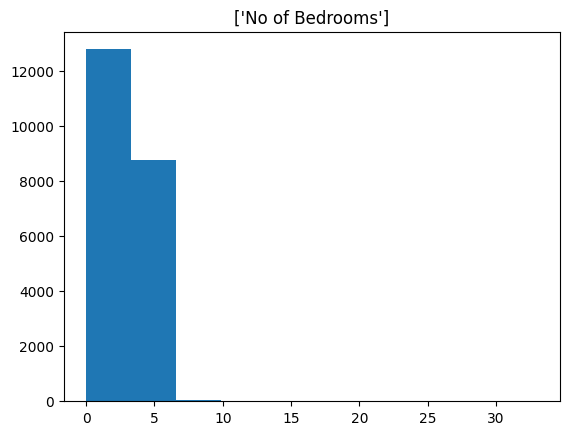

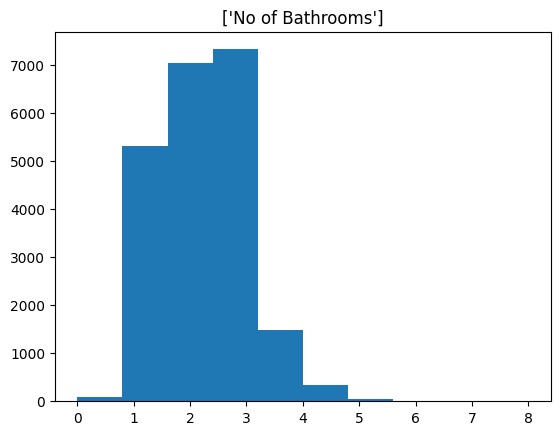

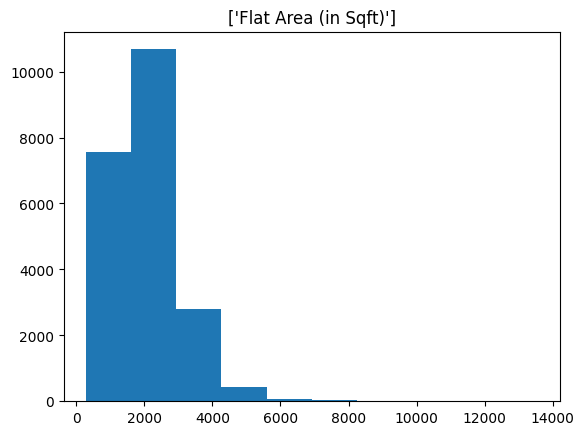

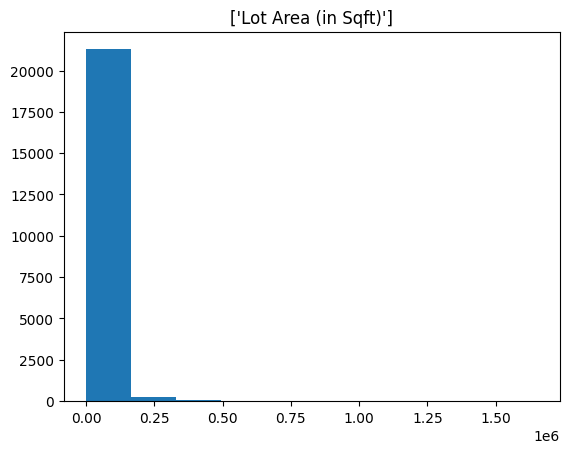

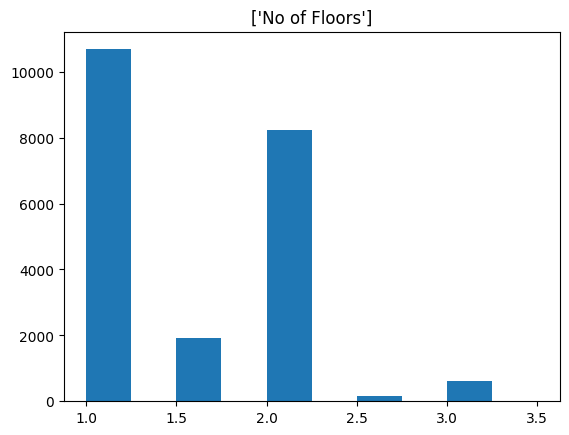

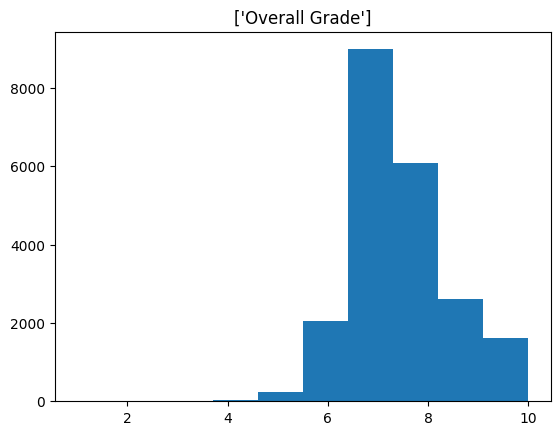

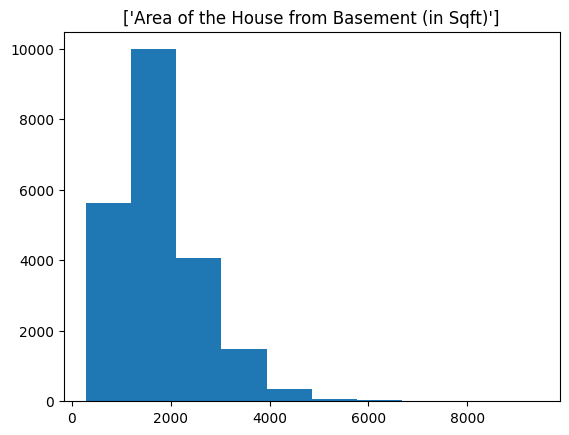

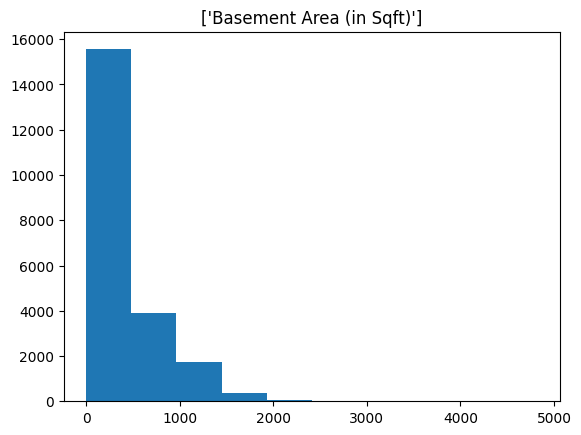

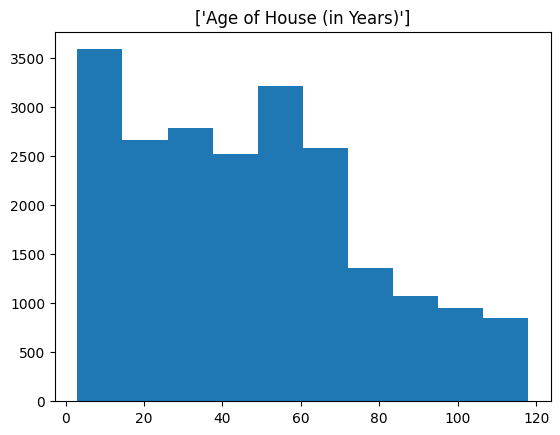

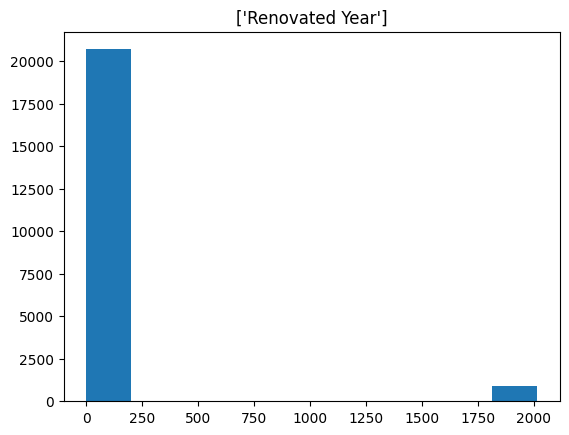

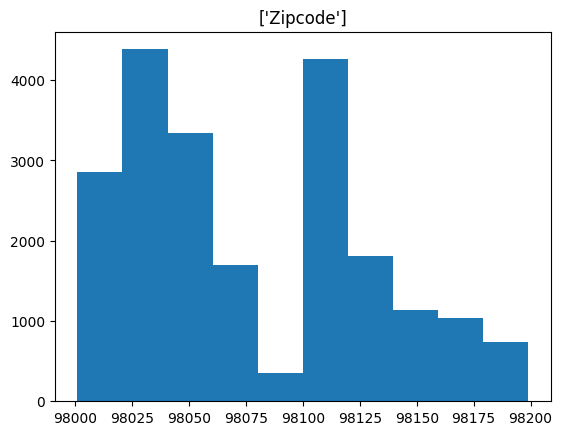

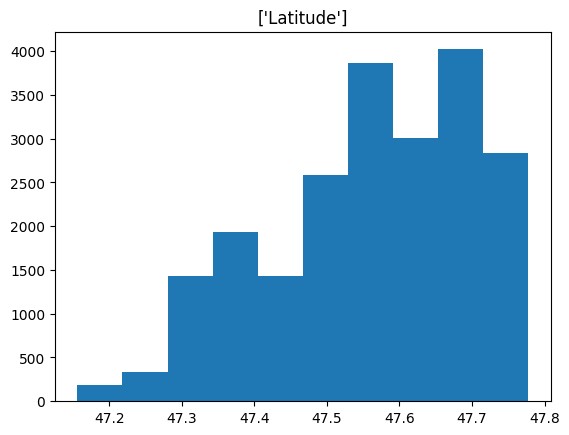

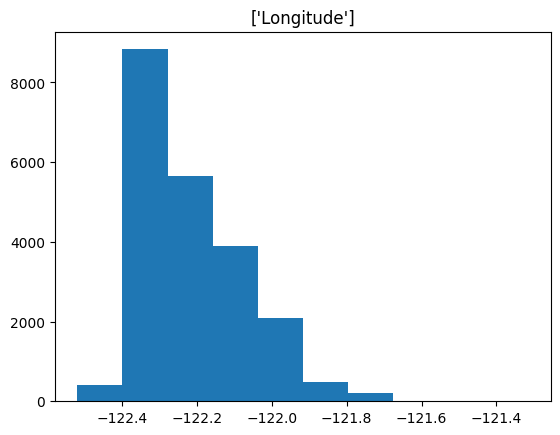

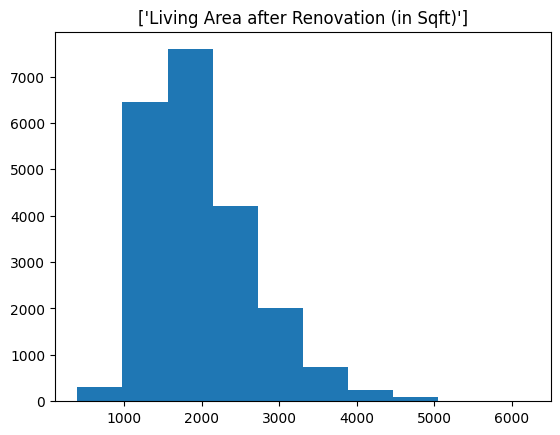

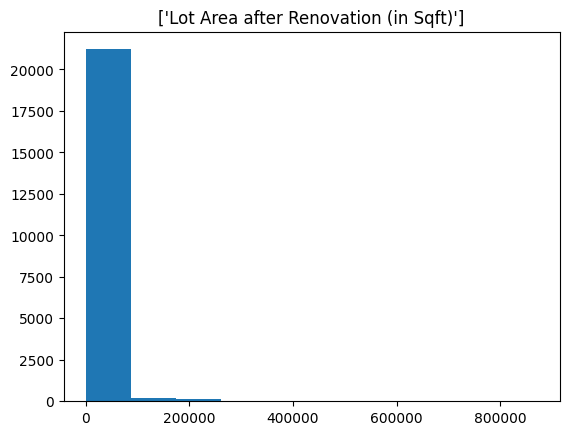

In [144]:
#data analaysis & visualization
#plot for neumerical data
for i in('ID',
 'Sale Price',
 'No of Bedrooms',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'No of Floors',
 'Overall Grade',
 'Area of the House from Basement (in Sqft)',
 'Basement Area (in Sqft)',
 'Age of House (in Years)',
 'Renovated Year',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)',
 'Lot Area after Renovation (in Sqft)'):
 plt.hist(df[i])
 plt.title([i])
 plt.show()

In [145]:
#remove no.of time visited
df.drop(columns=['No of Times Visited','Date House was Sold'],inplace=True)

In [146]:
df.isna().sum().sort_values(ascending=False)

Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Bathrooms                              4
Sale Price                                   4
Area of the House from Basement (in Sqft)    3
Living Area after Renovation (in Sqft)       1
Longitude                                    1
Latitude                                     1
Zipcode                                      1
ID                                           0
Age of House (in Years)                      0
Renovated Year                               0
Overall Grade                                0
Basement Area (in Sqft)                      0
Condition of the House                       0
Waterfront View                              0
No of Floors                                 0
No of Bedrooms                               0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [147]:
# Fill missing values with the median of the column
for i in ['Flat Area (in Sqft)','Lot Area (in Sqft)']:
    df[i].fillna(df[i].median(), inplace=True)

In [148]:
## Forward fill
for i in ['Zipcode','Latitude','Longitude',]:
  df[i]=df[i].interpolate(method='ffill')

In [149]:
# Backward fill
for i in ['Sale Price','No of Bathrooms','Living Area after Renovation (in Sqft)','Area of the House from Basement (in Sqft)']:
  df[i]=df[i].interpolate(method='bfill')

In [150]:
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [151]:
df.isna().sum()

ID                                           0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [152]:
df.shape

(21613, 19)

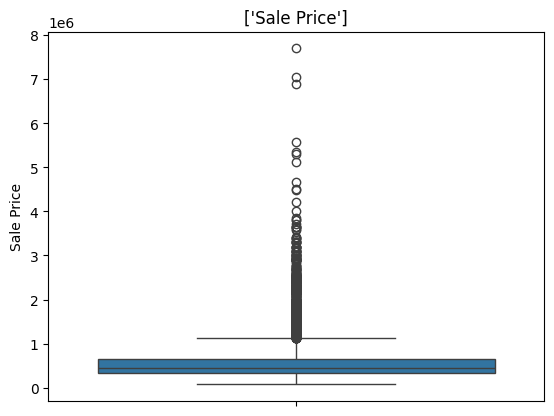

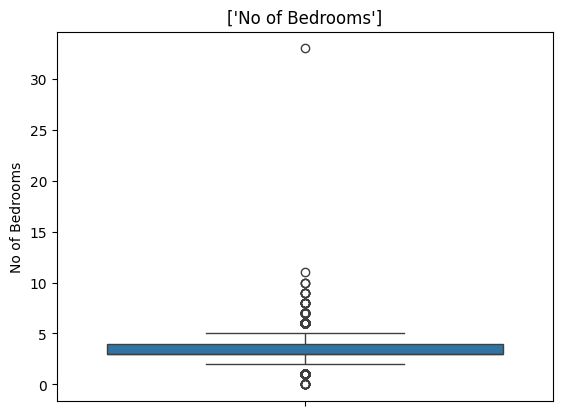

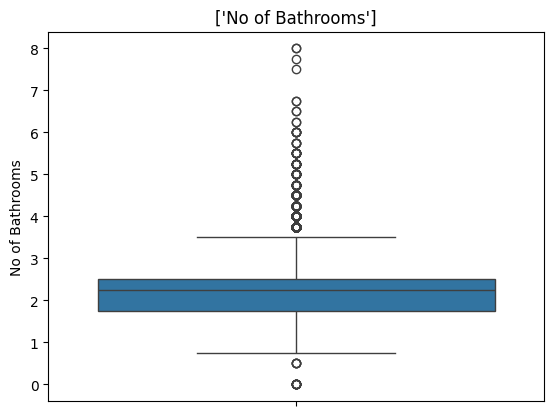

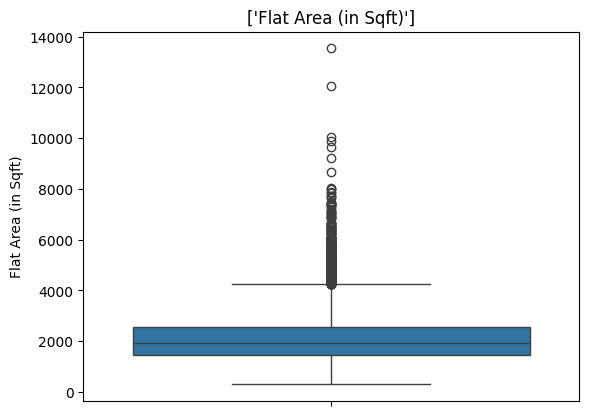

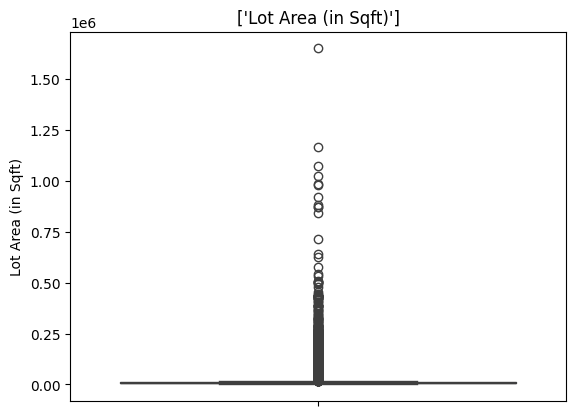

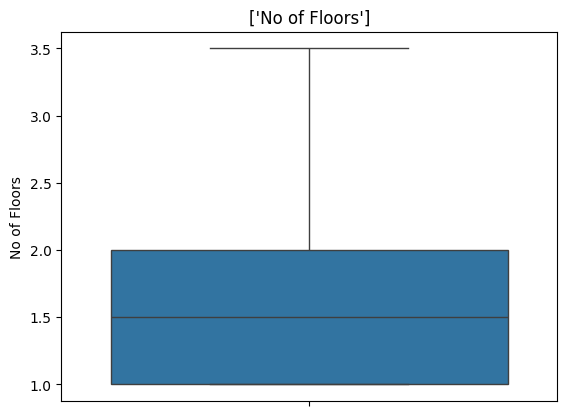

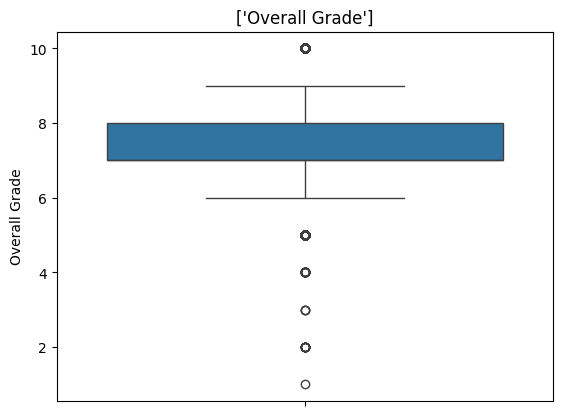

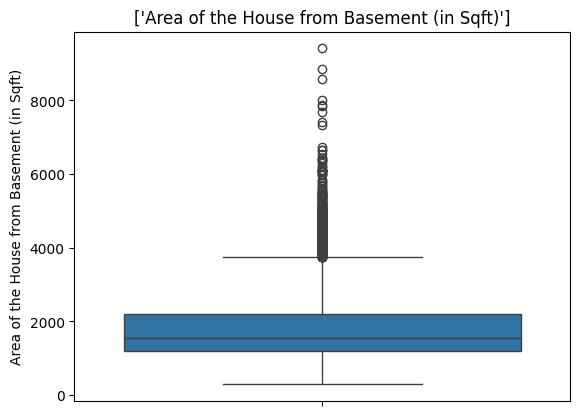

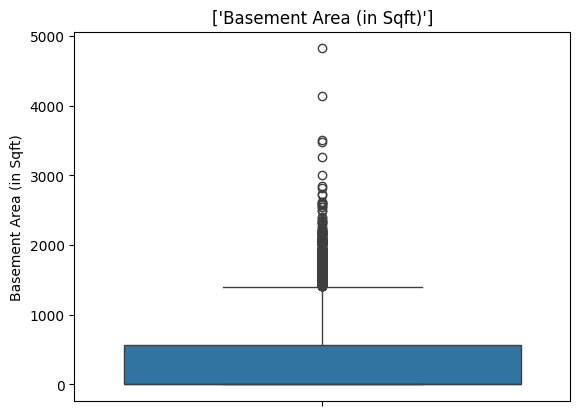

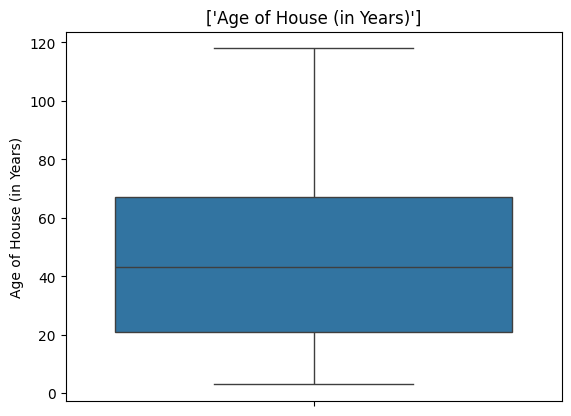

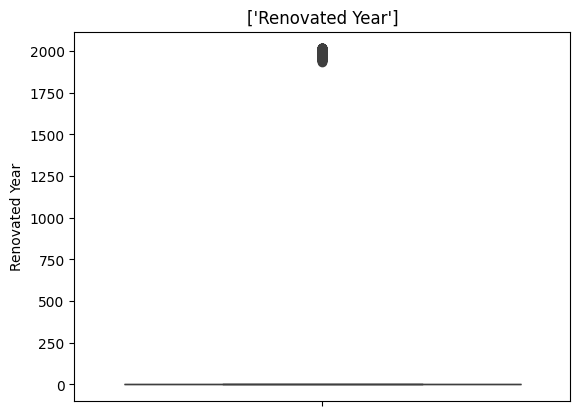

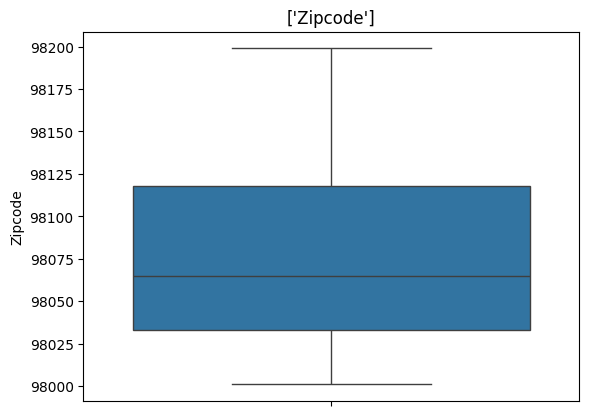

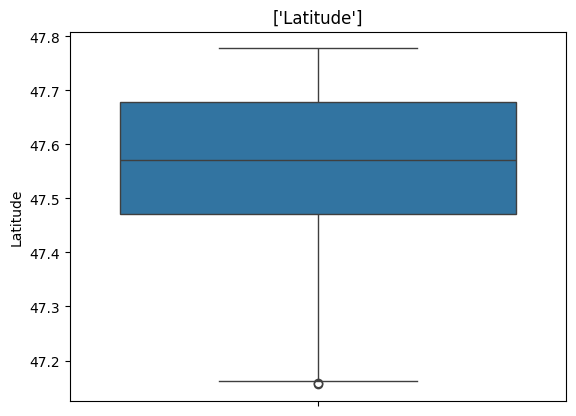

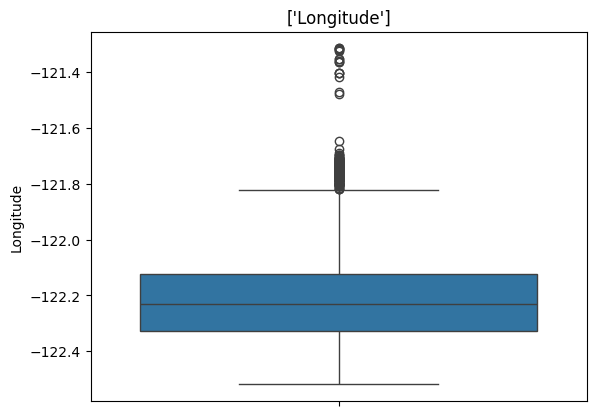

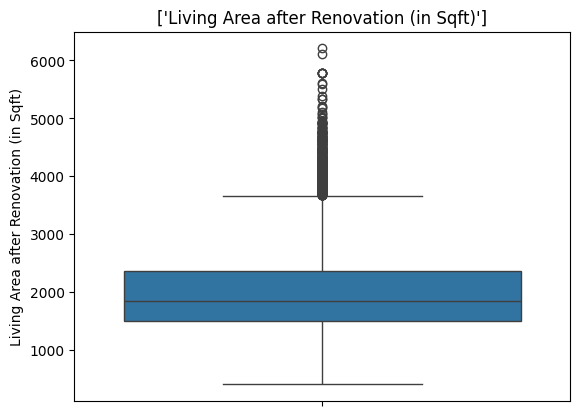

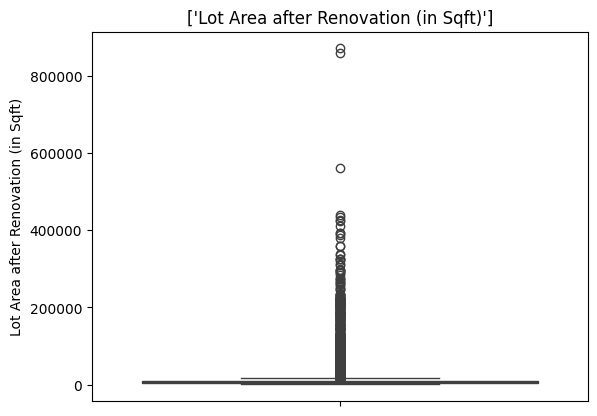

In [153]:
#outliers of data
for i in['Sale Price',
 'No of Bedrooms',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'No of Floors',
 'Overall Grade',
 'Area of the House from Basement (in Sqft)',
 'Basement Area (in Sqft)',
 'Age of House (in Years)',
 'Renovated Year',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)',
 'Lot Area after Renovation (in Sqft)']:
 sns.boxplot(df[i])
 plt.title([i])
 plt.show()

In [154]:
#handling outliers
q1=df['No of Bedrooms'].quantile(0.25)
q2=df['No of Bedrooms'].quantile(0.5)
q3=df['No of Bedrooms'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print(q1,q2,q3,iqr,upper,lower)

3.0 3.0 4.0 1.0 5.5 1.5


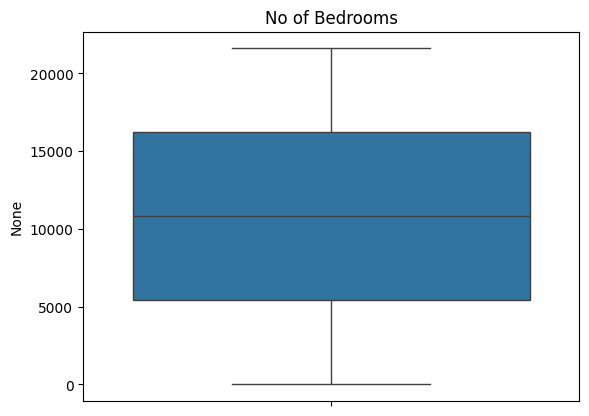

In [155]:
ul=df[(df['No of Bedrooms']<upper) | (df['No of Bedrooms']>lower)].index
sns.boxplot(y=ul)
plt.title('No of Bedrooms')
plt.show()

In [156]:
#Encode Categorical Data
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Waterfront View'] =le.fit_transform(df['Waterfront View'])
df.head()



,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [157]:
#one hot encoding data
data=df.copy()
data=pd.get_dummies(data,drop_first=True)
data.head()


,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Overall Grade,Area of the House from Basement (in Sqft),...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,98178.0,47.5112,-122.257,1340.0,5650,False,True,False,False
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1991,98125.0,47.7210,-122.319,1690.0,7639,False,True,False,False
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,98028.0,47.7379,-122.233,2720.0,8062,False,True,False,False
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,98136.0,47.5208,-122.393,1360.0,5000,True,False,False,False
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,98074.0,47.6168,-122.045,1800.0,7503,False,True,False,False


In [158]:
data.columns

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront View', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Condition of the House_Excellent', 'Condition of the House_Fair',
       'Condition of the House_Good', 'Condition of the House_Okay'],
      dtype='object')

In [159]:
for i  in ['Condition of the House_Excellent', 'Condition of the House_Fair',
       'Condition of the House_Good', 'Condition of the House_Okay']:
       data[i]=data[i].astype('int64')


In [160]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Overall Grade,Area of the House from Basement (in Sqft),...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,98178.0,47.5112,-122.257,1340.0,5650,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1991,98125.0,47.7210,-122.319,1690.0,7639,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,98028.0,47.7379,-122.233,2720.0,8062,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,98136.0,47.5208,-122.393,1360.0,5000,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,98074.0,47.6168,-122.045,1800.0,7503,0,1,0,0


In [161]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [162]:
columns_to_scale = ['Sale Price',
    'No of Bedrooms',
    'No of Bathrooms',
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'No of Floors',
    'Overall Grade',
    'Area of the House from Basement (in Sqft)',
    'Basement Area (in Sqft)',
    'Age of House (in Years)',
    'Renovated Year',
    'Zipcode',
    'Latitude',
    'Longitude',
    'Living Area after Renovation (in Sqft)',
    'Lot Area after Renovation (in Sqft)']

data[columns_to_scale] =sc.fit_transform(df[columns_to_scale])

In [163]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Overall Grade,Area of the House from Basement (in Sqft),...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,-0.866497,-0.398737,-1.447423,-0.979940,-0.228268,-0.915427,0,-0.564013,-0.734752,...,-0.210128,1.870231,-0.352591,-0.306092,-0.943342,-0.260715,0,1,0,0
1,6414100192,-0.006055,-0.398737,0.175737,0.533757,-0.189832,0.936506,0,-0.564013,0.460566,...,4.746678,0.879640,1.161496,-0.746357,-0.432671,-0.187868,0,1,0,0
2,5631500400,-0.980551,-1.473959,-1.447423,-1.426426,-0.123244,-0.915427,0,-1.468651,-1.229783,...,-0.210128,-0.933328,1.283460,-0.135667,1.070161,-0.172375,0,1,0,0
3,2487200875,0.173601,0.676485,1.149633,-0.130528,-0.243962,-0.915427,0,-0.564013,-0.891713,...,-0.210128,1.085235,-0.283310,-1.271836,-0.914161,-0.284522,1,0,0,0
4,1954400510,-0.082272,-0.398737,-0.148895,-0.435445,-0.169600,-0.915427,0,0.340626,-0.131056,...,-0.210128,-0.073570,0.409504,1.199332,-0.272174,-0.192849,0,1,0,0
